# Collision Analysis

### DATA EXPLORATION

 Importing all the required libraries

In [149]:
# Importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, roc_auc_score

#from mlxtend.evaluate import feature_importance_permutation

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn

Read the csv to a data frame

In [2]:
d1=pd.read_csv(r"C:\Users\ShubhobrotoDey\Downloads\IBM COURSERA\C9_Capstone\Data-Collisions.csv")

C:\Users\ShubhobrotoDey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Take a peek into the data and its shape

In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [4]:
d1.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [5]:
d1.shape

(194673, 38)

In [8]:
d1.nunique() #Analysing number of unique values per column

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

In [9]:
d1.isna().sum() #Finding total number of missing values in the data.

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

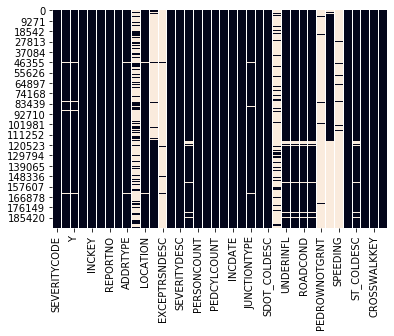

In [12]:
sns.heatmap(d1.isnull(), cbar=False) #Visualizing the missing values

Now that we have underdstood the distribiution of the data, our agenda is to find out the various types od collisions that have occured and what was the most severe type amongst them.

In [6]:
b=d1['COLLISIONTYPE'].value_counts().index
b

Index(['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn',
       'Pedestrian', 'Cycles', 'Right Turn', 'Head On'],
      dtype='object')

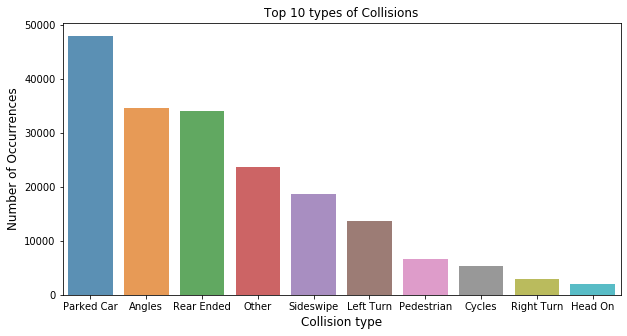

In [13]:
# Bar graph of top 10 type of collisions
import seaborn as sns
collision_count  = d1['COLLISIONTYPE'].value_counts()
collision_count = collision_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(collision_count.index, collision_count.values, alpha=0.8)
plt.title('Top 10 types of Collisions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Collision type', fontsize=12)
plt.show()

The above graph shows that Parked Car, Angles and Rear Ended collisions are the most frequest ones. Now we must find the severity of each type of collision to understand which has the most impact on life and property.

## DATA CLEANING

Once we are clear with our goal, we must clean the data such that the NaN values do not cause any drastic impact on our analysis.

If we want to describe the most severe type of collision, we must split our datatset first into target and feature sets. To achieve this, we must undertsand what are the factors that could contribiute to a collision. Based on uderstanding the data, we find some useful columns like Road condition, Light condition, Weather, Under Influence etc.
Once these columns are identified, we must make sure that these columns should have the least amount of unknown values.

In [150]:
# filling all na with the mode value in the columns that could be used a feature, so we can encode later
d1["UNDERINFL"] = d1["UNDERINFL"].fillna(d1["UNDERINFL"].mode()[0])
d1["LIGHTCOND"] = d1["LIGHTCOND"].fillna(d1["LIGHTCOND"].mode()[0])

In [17]:
# dropping the unecessary columns that are not required for this analysis.
d1.drop(['SEVERITYCODE','X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS',
         'ADDRTYPE','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','INCDATE',
         'INCDTTM','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLDESC','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'], axis=1, inplace=True)

In [18]:
d1.head(5)

,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Injury Collision,Angles,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Property Damage Only Collision,Parked Car,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN
3,1,Property Damage Only Collision,Other,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN
4,2,Injury Collision,Angles,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN


In [19]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE.1  194673 non-null  int64 
 1   SEVERITYDESC    194673 non-null  object
 2   COLLISIONTYPE   189769 non-null  object
 3   JUNCTIONTYPE    188344 non-null  object
 4   SDOT_COLCODE    194673 non-null  int64 
 5   SDOT_COLDESC    194673 non-null  object
 6   INATTENTIONIND  29805 non-null   object
 7   UNDERINFL       194673 non-null  object
 8   WEATHER         189592 non-null  object
 9   ROADCOND        189661 non-null  object
 10  LIGHTCOND       194673 non-null  object
 11  SPEEDING        9333 non-null    object
dtypes: int64(2), object(10)
memory usage: 17.8+ MB


Filling up the remaining columns with UNKNOWN string 

In [23]:
# filling all na with UNKNOWN string, so we can encode later
d1.fillna('UNKOWN', inplace=True)

Renaming the Severity Code column

In [41]:
d1.rename(columns={"SEVERITYCODE.1":"SEVERITYCODE"},inplace=True)


## DATA PREPROCESSING: OneHotEncoding

One hot encoding is a process by which categorical 
variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Since our target column is a categorical variable, we implent onehot encoding to build a decision tree.


In [30]:
ohe = OneHotEncoder(handle_unknown='ignore')


Building the target datframe. Since we want to analyse the Collision Types, we set the same as our Target Column.


In [31]:
# Creating a new dataframe for COLLISION_TYPE
# Then we will OneHotEncode the data to categories
COLLISION_type1 = d1['COLLISIONTYPE']
COLLISION_d1 = pd.DataFrame(COLLISION_type1, columns=['COLLISIONTYPE'])
COLLISION_d1 = pd.DataFrame(ohe.fit_transform(COLLISION_d1[['COLLISIONTYPE']]).toarray())

In [32]:
# Each column will be a COLLISION_TYPE, so we will need to label each column
COLLISION_col1 = d1['COLLISIONTYPE'].unique()
COLLISION_d1.columns = COLLISION_col1

In [33]:
COLLISION_d1.columns

Index(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles', 'Rear Ended',
       'Head On', 'UNKOWN', 'Left Turn', 'Pedestrian', 'Right Turn'],
      dtype='object')


Building the Features (label encoded) dataframe. This dataframe should contain all the causal factors that can contribute to the severity of a collision.

In [34]:
# Here we select the features we want to use and LabelEncode them using a for loop
# We will also create a new dataframe for them
text_col = ['WEATHER', 'LIGHTCOND', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'INATTENTIONIND', 'SPEEDING']
en_df1 = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    en_df1[col] = encoder.fit_transform(d1[col])
    
en_df1

,WEATHER,LIGHTCOND,JUNCTIONTYPE,UNDERINFL,ROADCOND,INATTENTIONIND,SPEEDING
0,4,5,1,2,9,0,0
1,6,2,4,0,9,0,0
2,4,5,4,0,0,0,0
3,1,5,4,2,0,0,0
4,6,5,1,0,9,0,0
...,...,...,...,...,...,...,...
194668,1,5,4,2,0,0,0
194669,6,5,4,2,9,1,0
194670,1,5,1,2,0,0,0
194671,1,6,1,2,0,0,0


Building the severity dataframe

In [42]:
sev_en_df = ['SEVERITYCODE','SEVERITYDESC']
sev_en_df = pd.DataFrame(d1[sev_en_df])
sev_en_df

,SEVERITYCODE,SEVERITYDESC
0,2,Injury Collision
1,1,Property Damage Only Collision
2,1,Property Damage Only Collision
3,1,Property Damage Only Collision
4,2,Injury Collision
...,...,...
194668,2,Injury Collision
194669,1,Property Damage Only Collision
194670,2,Injury Collision
194671,2,Injury Collision


One Hot Encoding the Severity dataframe.

In [43]:
sev_df1 = pd.DataFrame()
for col in sev_en_df:
    encoder = LabelEncoder()
    sev_df1[col] = encoder.fit_transform(d1[col])
    
sev_df1

,SEVERITYCODE,SEVERITYDESC
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
194668,1,0
194669,0,1
194670,1,0
194671,1,0


 Merging the label encoded feature set with the target set

In [44]:
# Merge the FIRST_CRASH_TYPE and the LabelEncoded dataframe together
df_01 = pd.merge(COLLISION_d1, en_df1, left_index=True, right_index=True)

In [45]:
df_01.columns

Index(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles', 'Rear Ended',
       'Head On', 'UNKOWN', 'Left Turn', 'Pedestrian', 'Right Turn', 'WEATHER',
       'LIGHTCOND', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'INATTENTIONIND',
       'SPEEDING'],
      dtype='object')

Here we are trying to understand which type of collision has more positive correlation with the severity of the crash.
In other words, what is the most severe type of collision.

In [72]:
col1=sev_df1['SEVERITYDESC']
col2=COLLISION_d1['Rear Ended']
corr=col1.corr(col2)
#corr.style.background_gradient(cmap='coolwarm')
print(corr)

0.3041475504360142


In [71]:
col1=sev_df1['SEVERITYDESC']
col2=COLLISION_d1['Parked Car']
corr=col1.corr(col2)
#corr.style.background_gradient(cmap='coolwarm')
print(corr)

-0.029539833846440273


In [70]:
col1=sev_df1['SEVERITYDESC']
col2=COLLISION_d1['Angles']
corr=col1.corr(col2)
#corr.style.background_gradient(cmap='coolwarm')
print(corr)

-0.09560707447733263


We see that Rear Ended Collisions have a positive correlation with the Severity, while the others exhibit a negative value. 
Thus moving forward, we will try to describe the causal factors of a Rear Ended Collision and build a classification model that can predict such kind of collisions.

Define Features and Target

In [124]:
# Defining our Features and Target
# For X, we want to remove all of the other CRASH types and keep the features.
y = df_01['Rear Ended']
X = df_01.drop(columns=['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles', 'Rear Ended',
       'Head On', 'UNKOWN', 'Left Turn', 'Pedestrian', 'Right Turn'], axis=1)

In [125]:
X.columns

Index(['WEATHER', 'LIGHTCOND', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND',
       'INATTENTIONIND', 'SPEEDING'],
      dtype='object')

## Model Selection and Evaluation : Decision Tree Approach

In [126]:
# Train and Test on a basic model (test size to 20%)
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=1,max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [141]:
dt=dt_model.fit(X_train, y_train)

In [142]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [143]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.8086722572525652
Accuracy Score Test: 0.8098369076666239
ROC_AUC Test: 0.629644421001453


AUC stands for "Area under the ROC Curve." i.e, AUC measures the entire two-dimensional area underneath the entire ROC curve. AUC provides an aggregate measure of performance across all possible classification thresholds.


Accuracy Score Train: 0.8086722572525652

Accuracy Score Test: 0.8098369076666239

ROC_AUC Test: 0.629644421001453

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89    117348
         1.0       0.86      0.27      0.41     38390

    accuracy                           0.81    155738
   macro avg       0.83      0.63      0.65    155738
weighted avg       0.82      0.81      0.77    155738



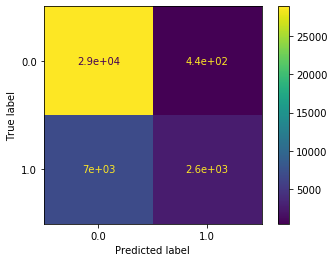

In [147]:
from sklearn.metrics import classification_report, confusion_matrix
threshold = 0.1
y_test_pred = y_train_pred >= threshold
print(classification_report(y_train, y_test_pred))
pd.DataFrame(confusion_matrix(y_train, y_test_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
plot_confusion_matrix(dt,X_test,y_test)

Area under the Receiver Operating Characteristic curve: 0.626481926800046


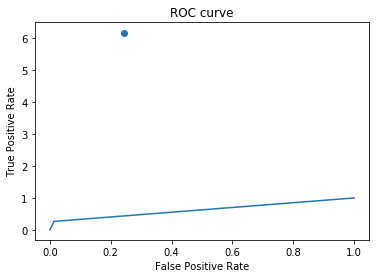

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_test_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_test_pred))
    
# When threshold = 0.1
false_positives = 28135
true_positives = 10255
actual_negative=115686
actual_positive=1662
false_positive_rate = false_positives/actual_negative
true_positive_rate = true_positives/actual_positive
plt.scatter(false_positive_rate, true_positive_rate)


## Model Selection and Evaluation : Logistic Regression

0.7848208552716065
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     29392
         1.0       0.64      0.28      0.39      9543

    accuracy                           0.78     38935
   macro avg       0.72      0.61      0.63     38935
weighted avg       0.76      0.78      0.75     38935



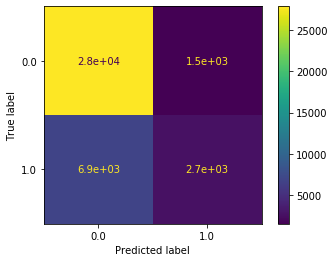

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


LR = LogisticRegression(max_iter=100000)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.20)

LR.fit(X_train1,y_train1)
score = LR.score(X_test1, y_test1)
print(score)


plot_confusion_matrix(LR,X_test1,y_test1)

y_pred = LR.predict(X_test1) 
print(classification_report(y_test1, y_pred))

In [138]:
y_train_pred1 = LR.predict(X_train1)
y_test_pred1 = LR.predict(X_test1)

In [139]:
from sklearn.metrics import classification_report, confusion_matrix
threshold = 0.1
y_test_pred1 = y_train_pred1 >= threshold
print(classification_report(y_train1, y_test_pred1))
pd.DataFrame(confusion_matrix(y_train1, y_test_pred1), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87    117294
         1.0       0.65      0.28      0.39     38444

    accuracy                           0.79    155738
   macro avg       0.73      0.62      0.63    155738
weighted avg       0.76      0.79      0.75    155738



,Predicted Negative,Predicted Positive
Actual Negative,111529,5765
Actual Positive,27637,10807


Area under the Receiver Operating Characteristic curve: 0.6159800935487431


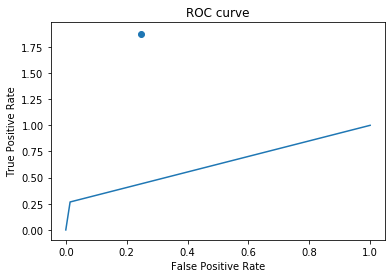

In [140]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_test_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train1, y_test_pred1))
    
# When threshold = 0.1
false_positives = 27637
true_positives = 10807
actual_negative=111529
actual_positive=5765
false_positive_rate = false_positives/actual_negative
true_positive_rate = true_positives/actual_positive
plt.scatter(false_positive_rate, true_positive_rate)


The ROC_AUC is more for the Decision Tree Model as compared to the LR model, which means the DT model is a better classifier to identify 'Rear Ended' crashes as compared to the LR model.
Now we will see what are the factors that contribiute most to a rear-ended collision

### Feature Analysis

In [100]:
# Lets look at which feature is the most important
dt_model.feature_importances_

array([7.74554443e-02, 2.34555424e-01, 6.84525321e-01, 0.00000000e+00,
       1.08657169e-03, 6.69229010e-04, 1.70800961e-03])

In [101]:
# LIGHTING_CONDITION, JUNCTION TYPE
# seems to be the most important
X

,WEATHER,LIGHTCOND,JUNCTIONTYPE,UNDERINFL,ROADCOND,INATTENTIONIND,SPEEDING
0,4,5,1,2,9,0,0
1,6,2,4,0,9,0,0
2,4,5,4,0,0,0,0
3,1,5,4,2,0,0,0
4,6,5,1,0,9,0,0
...,...,...,...,...,...,...,...
194668,1,5,4,2,0,0,0
194669,6,5,4,2,9,1,0
194670,1,5,1,2,0,0,0
194671,1,6,1,2,0,0,0


Feature ranking:
1. feature 2 (0.684525)
2. feature 1 (0.234555)
3. feature 0 (0.077455)
4. feature 6 (0.001708)
5. feature 4 (0.001087)
6. feature 5 (0.000669)
7. feature 3 (0.000000)


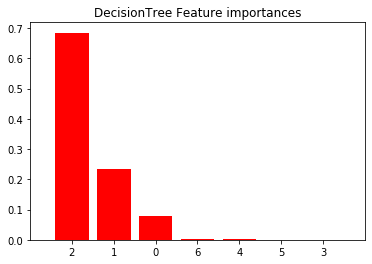

In [102]:
# Here we graph out which feature is the most imporant.

importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

We have determined the causal factors for rear end collisions. Nowe we try to visualise the decision tree, as how each of the factors contribute to a rear end collision.

### Building the Decision Tree

In [103]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [104]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\ShubhobrotoDey\anaconda3\Library\bin\graphviz'

In [105]:
import graphviz


# This plot tree helper function can plot the DecisionTreeClassifier 
# We can check what feature our model is splitting on and what are the requirements
def plot_tree(dt_model, used_cols, out_file='mytree.png'):
    export_graphviz(dt_model, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)



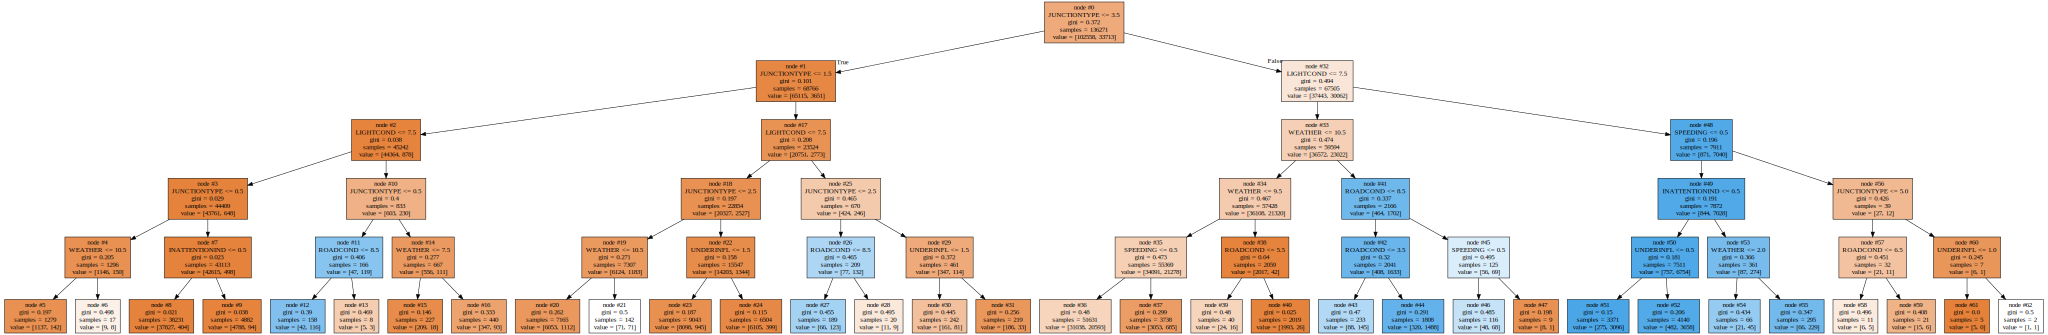

In [106]:
# Since we have a lot of data, lets only set max_depth=5
# This will speed up the process to graph
dt_model2 = DecisionTreeClassifier(random_state=1, max_depth=5)
dt_model2.fit(X_train, y_train)
plot_tree(dt_model2, X.columns.tolist())

In [108]:
# Feature 2
d1['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
UNKOWN                                                6329
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [109]:
d1.head(3)

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Injury Collision,Angles,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",UNKOWN,N,Overcast,Wet,Daylight,UNKOWN
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",UNKOWN,0,Raining,Wet,Dark - Street Lights On,UNKOWN
2,1,Property Damage Only Collision,Parked Car,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",UNKOWN,0,Overcast,Dry,Daylight,UNKOWN


In [110]:
# Selecting the columns with only "Rear Ended crashes
rear_end = d1[d1['COLLISIONTYPE'] == 'Rear Ended']
rear_end.JUNCTIONTYPE.value_counts().index

Index(['Mid-Block (not related to intersection)',
       'Mid-Block (but intersection related)',
       'At Intersection (intersection related)',
       'At Intersection (but not related to intersection)',
       'Driveway Junction', 'UNKOWN', 'Ramp Junction'],
      dtype='object')

### Visualizing the Impact of each major feature on rear End Type Crashes. Here are the top 3 reasons.

Junction Type : Category of junction at which collision took place 

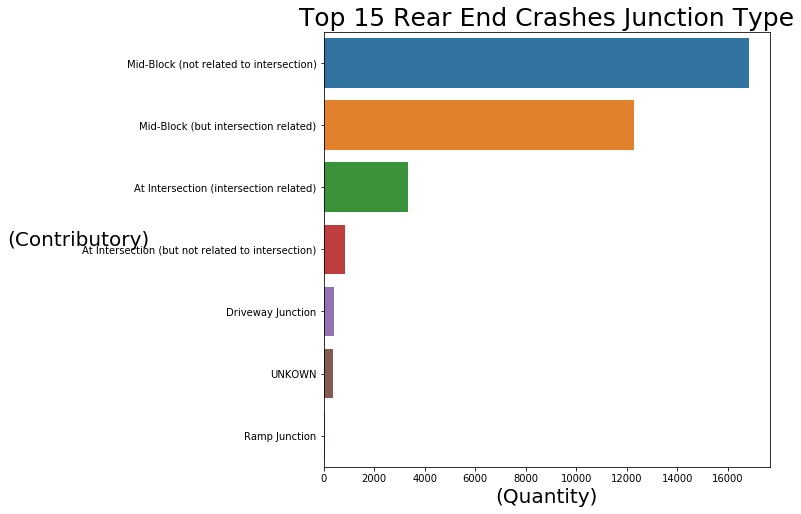

In [111]:
# Bar graph of top 15 Junction Types

plt.figure(figsize=(8,8))

y= rear_end.JUNCTIONTYPE.value_counts().values[:15]
x=rear_end.JUNCTIONTYPE.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Junction Type', size=25)
plt.ylabel("(Contributory)", size=20, rotation=0)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);

In [113]:
# Selecting the columns with only "Rear Ended" crashes
rear_end = d1[d1['COLLISIONTYPE'] == 'Rear Ended']
rear_end.LIGHTCOND.value_counts().index

Index(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Unknown', 'Dawn',
       'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'],
      dtype='object')

LightCond : The light conditions during the collision.

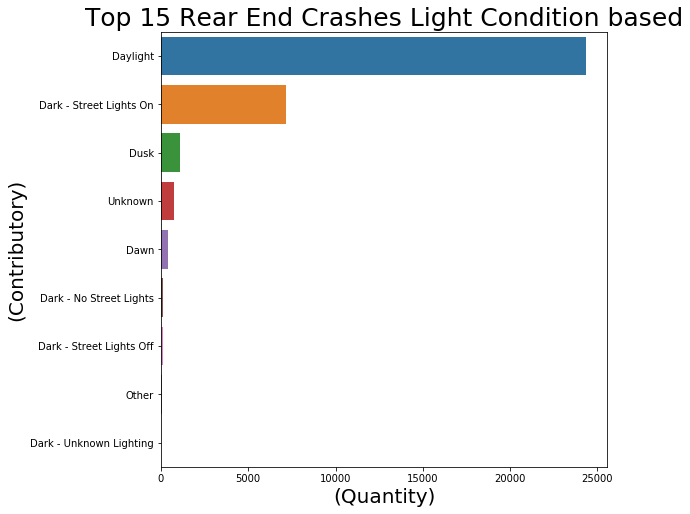

In [114]:
# Bar graph of top 15 Light conditions

plt.figure(figsize=(8,8))

y= rear_end.LIGHTCOND.value_counts().values[:15]
x=rear_end.LIGHTCOND.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Light Condition based', size=25)
plt.ylabel("(Contributory)", size=20, rotation=90)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);

In [115]:
# Selecting the columns with only "Rear Ended" crashes
rear_end = d1[d1['COLLISIONTYPE'] == 'Rear Ended']
rear_end.WEATHER.value_counts().index

Index(['Clear', 'Raining', 'Overcast', 'Unknown', 'Fog/Smog/Smoke', 'Snowing',
       'Other', 'UNKOWN', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind'],
      dtype='object')

Weather : A description of the weather conditions during the time of the collision.

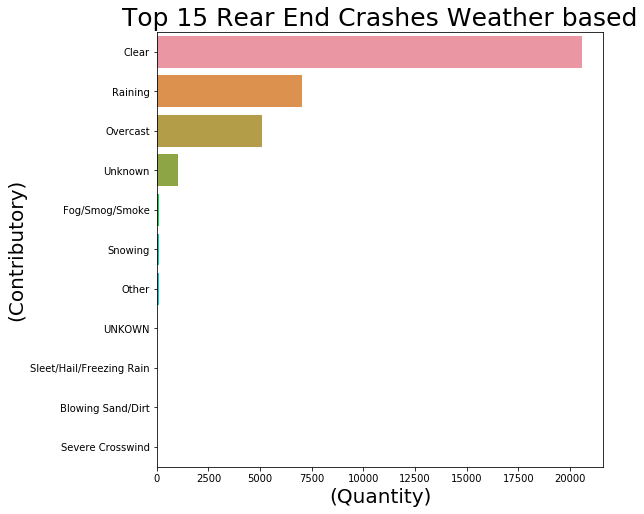

In [116]:
# Bar graph of top 15 Weather conditions

plt.figure(figsize=(8,8))

y= rear_end.WEATHER.value_counts().values[:15]
x=rear_end.WEATHER.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Weather based', size=25)
plt.ylabel("(Contributory)", size=20, rotation=90)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);

From the above analysis we understand that rear ended collisions have the most severity. Weather, light conditions and type of junction plays a crucial role in these type of collisions.